* Dates:
    * Older moves might not be torrented
    * Month: Blockbusters are released in May and December, No good movies released January - April, Kids are on summer cvaction during summer months.
* Production Budget: 
    * Might be outliers. Take log if outliers, Remove outliers, Create new feature that is binning production budget
* Rating: Is there a relationship with Number of torrents, look at mean, median torrents per rating. Maybe group ratings together for example G, PG, PG-13 in one group R in another
* Genre as a feature. Maybe keep a subset maybe create new ratings by combing other ratings

In [27]:
import pandas as pd
import numpy as np

import operator
import string
from collections import defaultdict

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

import plotly
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.tools import FigureFactory as FF
plotly.tools.set_credentials_file(username='bbiggs', api_key='jrgs2lfv3u')

# Read in data and convert dates to datetime objects

In [28]:
df = pd.read_csv('data/data.csv', encoding='latin-1')

df['Released'] = pd.to_datetime(df['Released'])
df['Year'] = pd.DatetimeIndex(df['Released']).year
df['Month'] = pd.DatetimeIndex(df['Released']).month

In [29]:
# dictionary - year counts
yr_dict = df['Year'].value_counts().to_dict()

yr_lst = sorted(yr_dict.items(), key=operator.itemgetter(0)) # sort by year
yr_lst = yr_lst[::-1]

bar_year = [year for year, count in yr_lst]
bar_count = [count for year, count in yr_lst]

data = [go.Bar(x=bar_year, y=bar_count)]

py.iplot(data, filename='basic-bar')

# Trim dataframe by years that are relevant

In [30]:
# cut off at year 
before = len(df)
yr_cut_bot = 1995
yr_cut_top = 2015
mask = (df['Year'] >= yr_cut_bot) & (df['Year'] < yr_cut_top)
df = df.loc[mask]
df.sort_values('Year').head()
after = len(df)

print('{0} entries lost ({1}%) due to date cutoff between {2} and {3}'.format(before-after, 
                                                round((before/after)/before *100, 2), yr_cut_bot, yr_cut_top))

345 entries lost (0.08%) due to date cutoff between 1995 and 2015


In [31]:
# dictionary - year counts
yr_dict = df['Year'].value_counts().to_dict()

yr_lst = sorted(yr_dict.items(), key=operator.itemgetter(0)) # sort by year
yr_lst = yr_lst[::-1]

bar_year = [year for year, count in yr_lst]
bar_count = [count for year, count in yr_lst]

data = [go.Bar(x=bar_year, y=bar_count)]
py.iplot(data, filename='basic-bar')

In [8]:
# 1998
mask =  (df_yr['Year'] == 1998) & (df_yr['Total_Torrents'] > 100)
df_yr = df_yr[~mask]

# 1999
mask =  (df_yr['Year'] == 1999) & (df_yr['Total_Torrents'] > 200)
df_yr = df_yr[~mask]

# 2000
mask =  (df_yr['Year'] == 2000) & (df_yr['Total_Torrents'] > 200)
df_yr = df_yr[~mask]

# 2001
mask =  (df_yr['Year'] == 2001) & (df_yr['Total_Torrents'] > 300)
df_yr = df_yr[~mask]

# 2002
mask =  (df_yr['Year'] == 2002) & (df_yr['Total_Torrents'] > 300)
df_yr = df_yr[~mask]

# 2003
mask =  (df_yr['Year'] == 2003) & (df_yr['Total_Torrents'] > 300)
df_yr = df_yr[~mask]

# 2004
# 2005
mask =  (df_yr['Year'] == 2005) & (df_yr['Total_Torrents'] > 300)
df_yr = df_yr[~mask]

# 2006
mask =  (df_yr['Year'] == 2006) & (df_yr['Total_Torrents'] > 300)
df_yr = df_yr[~mask]

# 2007
mask =  (df_yr['Year'] == 2007) & (df_yr['Total_Torrents'] > 450)
df_yr = df_yr[~mask]

# 2010
mask =  (df_yr['Year'] == 2010) & (df_yr['Total_Torrents'] > 800)
df_yr = df_yr[~mask]

# 2014
mask =  (df_yr['Year'] == 2014) & (df_yr['Total_Torrents'] > 850)
df_yr = df_yr[~mask]

In [33]:
df_a = df[['Prod_Budget', 'Year', 'Month', 'Runtime', 'Total_Torrents']]

In [37]:
fig = FF.create_scatterplotmatrix(df_a, diag='histogram', index='Prod_Budget', height=800, width=800)
py.iplot(fig, filename='Histograms along Diagonal Subplots')

This is the format of your plot grid:
[ (1,1) x1,y1 ]    [ (1,2) x2,y2 ]    [ (1,3) x3,y3 ]    [ (1,4) x4,y4 ]  
[ (2,1) x5,y5 ]    [ (2,2) x6,y6 ]    [ (2,3) x7,y7 ]    [ (2,4) x8,y8 ]  
[ (3,1) x9,y9 ]    [ (3,2) x10,y10 ]  [ (3,3) x11,y11 ]  [ (3,4) x12,y12 ]
[ (4,1) x13,y13 ]  [ (4,2) x14,y14 ]  [ (4,3) x15,y15 ]  [ (4,4) x16,y16 ]



In [42]:
# set of grouped genres as list of strings
unq_genres = df['Genre'].unique()
unq_genres = unq_genres.tolist()

# set grouped genres as list of lists
lst_grp_genres = []
for lst in unq_genres:
    temp = []
    for genre in lst.split(','):
         temp.append(genre)
    lst_grp_genres.append(temp)
    
# set list of individual genres
ind_genre = set()

for lst in unq_genres:
    for genre in lst.split(','):
        ind_genre.add(genre.strip())
ind_genre = sorted(ind_genre)

In [47]:
# dictionary - count of genre occurences
count = defaultdict(lambda:0)

for genre in ind_genre:
    count[genre] = df.Genre.str.contains(genre).sum()

import operator
srt = sorted(count.items(), key=operator.itemgetter(1))
srt = srt[::-1]

In [46]:
genre = [genre for genre, count in srt]
genre_count = [count for genre, count in srt]

data = [go.Bar(x=genre, y=genre_count)]
py.iplot(data, filename='basic-bar')

In [15]:
def split_to_array(ser):
    split_array = np.array(ser.strip().replace(',','').split(' '))
    return pd.Series(split_array)

genres = df_yr.Genre.apply(split_to_array)
genres = pd.Series(genres.values.ravel()).dropna()
genres = genres.value_counts().sort_values(ascending=False)

In [16]:
def convert_frequency(ser, genres=genres):
    split_array = np.array(ser.strip().replace(',','').split(' '))
    genre = genres.loc[split_array].argmax()
    return genre

df_yr['Genre_Single'] = df_yr.Genre.apply(convert_frequency)

# Select only significant values from dataframe
# df_yr => df_sub

In [17]:
# select only genres of significance
genre = ['Action', 'Adventure', 'Comedy', 'Crime', 'Drama']
df_sub = df_yr.loc[df_yr['Genre_Single'].isin(genre)]

# select only genres of significance
ratings = ['PG-13', 'PG', 'G', 'R']
df_sub = df_sub.loc[df_sub['Rated'].isin(ratings)]

#df_sub['Runtime'].value_counts()
#df_sub['Genre_Single'].value_counts()
#df_sub['Rated'].value_counts()
df_sub.describe()

,Prod_Budget,Dom_Gross,World_Gross,Year,Month,Runtime,Total_Torrents
count,8.310000e+02,8.310000e+02,8.310000e+02,831.000000,831.000000,831.000000,831.000000
mean,5.472210e+07,6.820220e+07,1.444551e+08,2006.643803,6.654633,108.987966,239.178099
std,4.562489e+07,7.106079e+07,1.794315e+08,4.645060,3.320596,17.172122,209.508753
min,1.000000e+05,0.000000e+00,0.000000e+00,1998.000000,1.000000,72.000000,20.000000
25%,2.500000e+07,2.301646e+07,3.498650e+07,2003.000000,4.000000,97.000000,91.000000
50%,4.000000e+07,4.467276e+07,8.174262e+07,2007.000000,7.000000,106.000000,167.000000
75%,7.000000e+07,8.901122e+07,1.837114e+08,2011.000000,9.000000,118.000000,322.000000
max,2.750000e+08,6.232795e+08,1.519480e+09,2014.000000,12.000000,191.000000,1294.000000


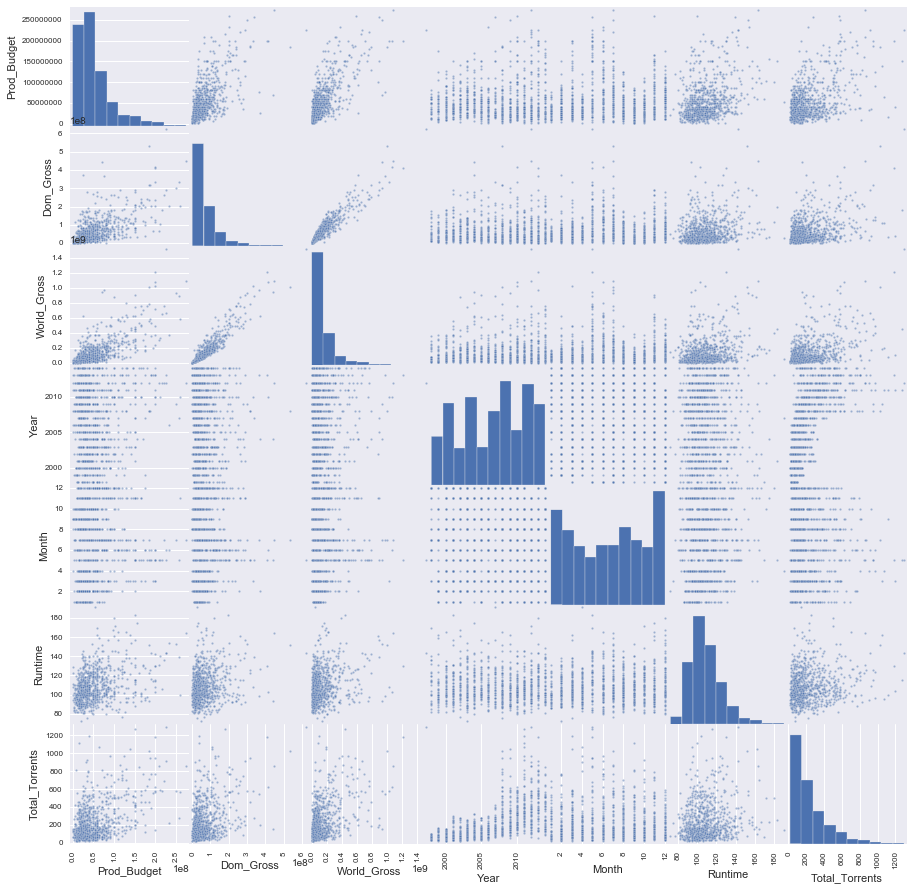

In [18]:
# entire dataframe
plt.rcParams['figure.figsize'] = (15, 15)
_ = pd.tools.plotting.scatter_matrix(df_sub)

In [19]:
import plotly.plotly as py
from plotly.tools import FigureFactory as FF

df_a = df_yr[['Prod_Budget', 'Year', 'Month', 'Total_Torrents']]
fig = FF.create_scatterplotmatrix(df_a, diag='histogram', index='Month',
                                  height=800, width=800)
py.iplot(fig, filename='Histograms along Diagonal Subplots')

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]  [ (1,3) x3,y3 ]
[ (2,1) x4,y4 ]  [ (2,2) x5,y5 ]  [ (2,3) x6,y6 ]
[ (3,1) x7,y7 ]  [ (3,2) x8,y8 ]  [ (3,3) x9,y9 ]



In [20]:
from patsy import dmatrices
patsy_formula = 'Total_Torrents ~ Prod_Budget + Year + Month + Runtime + Genre_Single'
y, x = dmatrices(patsy_formula, data=df_sub, return_type='dataframe')

In [21]:
import statsmodels.api as sm
model = sm.OLS(y, x)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Total_Torrents   R-squared:                       0.564
Model:                            OLS   Adj. R-squared:                  0.560
Method:                 Least Squares   F-statistic:                     132.8
Date:                Mon, 18 Jul 2016   Prob (F-statistic):          1.79e-142
Time:                        08:50:00   Log-Likelihood:                -5275.5
No. Observations:                 831   AIC:                         1.057e+04
Df Residuals:                     822   BIC:                         1.061e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------------
Intercept                 -4.868e+04   2112.787    -23.043      0.000     -5.28e+04 -4.45e+04
Genre_Single[T.Adventure]  -117.0245     33.477     -3.496      0.000      -182.735   -51.314
Genre_Single[T.Comedy]     -117.3887     14.304     -8.207      0.000      -145.465   -89.313
Genre_Single[T.Crime]      -103.9715     99.395     -1.046      0.296      -299.070    91.127
Genre_Single[T.Drama]       -85.4511     15.308     -5.582      0.000      -115.499   -55.403
Prod_Budget                1.614e-06   1.26e-07     12.808      0.000      1.37e-06  1.86e-06
Year                         24.3846      1.052     23.187      0.000        22.320    26.449
Month                        -2.7683      1.461     -1.894      0.059        -5.637     0.100
Runtime                       0.0727      0.335      0.217      0.828        -0.585     0.730
==============================================================================
Omnibus:                      335.796   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2087.428
Skew:                           1.715   Prob(JB):                         0.00
Kurtosis:                       9.966   Cond. No.                     3.12e+10
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.12e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [25]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x, y)
mod_lr_score = model.score(x, y)
mod_lr_coef = model.coef_
model.results

AttributeError: 'LinearRegression' object has no attribute 'results'

In [23]:
from sklearn import cross_validation as cv
from sklearn import metrics

x_train, x_test, y_train, y_test = cv.train_test_split(x,y,test_size=0.20,random_state=1234)

model = LinearRegression().fit(x_train, y_train)

# store results
mean_sq_err = metrics.mean_squared_error(y_train,model.predict(x_train))
cv_mod_score = model.score(x_train, y_train)

In [24]:
# reset x, y otherwise errors occur
y, x = dmatrices(patsy_formula, data=df_sub, return_type='dataframe')

from sklearn.cross_validation import KFold
kf = KFold(len(df_sub), n_folds=10, shuffle=True)

for train_index, test_index in kf:
    x_train, x_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    clf2 = LinearRegression().fit(x.iloc[train_index], y.iloc[train_index])

# store results
mean_sq_errKf = metrics.mean_squared_error(y_train,model.predict(x_train))
cvKf_mod_score = clf2.score(x,y)

In [25]:
#NORMAL RESULTS
print('Model Linear Regression Score = {0}'.format(mod_lr_score))
print('            Mean Square Error = {0}'.format(mean_sq_err))
print(' Cross Validation Model Score = {0}'.format(cv_mod_score))
print('     Mean Squred Error K-Fold = {0}'.format(mean_sq_errKf))
print('Cross Val. K-Fold Model Score = {0}'.format(cvKf_mod_score))

Model Linear Regression Score = 0.5637585057663514
            Mean Square Error = 16802.48849203602
 Cross Validation Model Score = 0.583389787152084
     Mean Squred Error K-Fold = 20315.438340557073
Cross Val. K-Fold Model Score = 0.5636421547468506


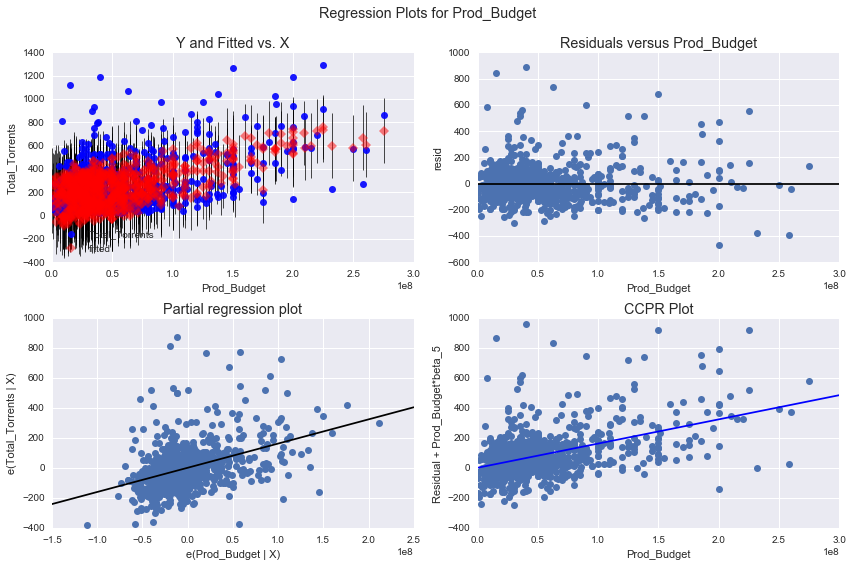

In [26]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(results,'Prod_Budget', fig=fig)

---
# Log Transform

In [27]:
df.columns

Index(['Title', 'Prod_Budget', 'Released', 'Year', 'Month', 'Rated', 'Runtime',
       'Genre', 'Director', 'Actors', 'Total_Torrents'],
      dtype='object')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x111f9d828>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11045ceb8>]], dtype=object)

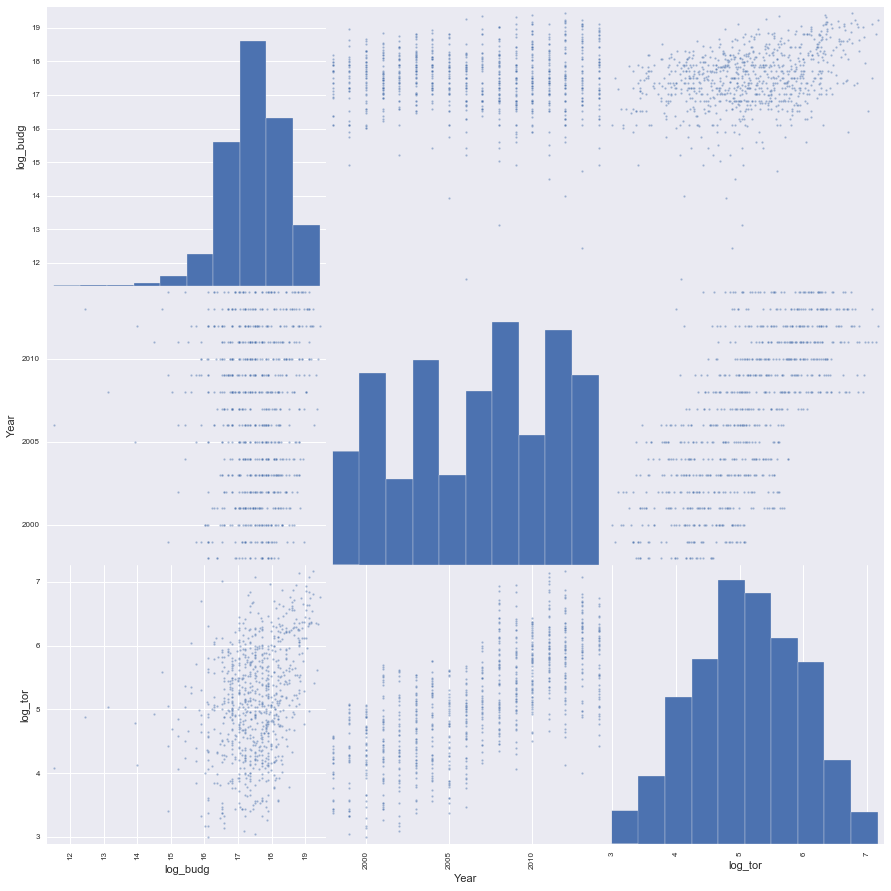

In [28]:
df_sub['log_budg']=np.log(df_sub.Prod_Budget)
#df_sub['log_year']=np.log(df_sub.Year)
#df_sub['log_run']=np.log(df_sub.Runtime)
df_sub['log_tor']=np.log(df_sub.Total_Torrents)

trans = df_sub[['log_budg', 'Year', 'log_tor']]
plt.rcParams['figure.figsize'] = (15, 15)
pd.tools.plotting.scatter_matrix(trans)

In [29]:
log_patsy_formula = 'log_tor ~ log_budg + Year + Month'
y, x = dmatrices(log_patsy_formula, data=df_sub, return_type='dataframe')

In [39]:
import plotly.plotly as py
from plotly.tools import FigureFactory as FF

df_a = df_sub[['log_budg', 'Year', 'Month', 'log_tor']]
fig = FF.create_scatterplotmatrix(df_a, diag='histogram', index='Month',
                                  height=800, width=800)
py.iplot(fig, filename='Histograms along Diagonal Subplots')

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]  [ (1,3) x3,y3 ]
[ (2,1) x4,y4 ]  [ (2,2) x5,y5 ]  [ (2,3) x6,y6 ]
[ (3,1) x7,y7 ]  [ (3,2) x8,y8 ]  [ (3,3) x9,y9 ]



In [31]:
import statsmodels.formula.api as smf
results = smf.ols(formula=log_patsy_formula, data=df_sub,).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                log_tor   R-squared:                       0.593
Model:                            OLS   Adj. R-squared:                  0.592
Method:                 Least Squares   F-statistic:                     401.7
Date:                Fri, 15 Jul 2016   Prob (F-statistic):          6.23e-161
Time:                        13:26:37   Log-Likelihood:                -680.04
No. Observations:                 831   AIC:                             1368.
Df Residuals:                     827   BIC:                             1387.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept   -257.3320      8.250    -31.190      0.000      -273.526  -241.138
log_budg       0.3163      0.021     14.744      0.000         0.274     0.358
Year           0.1281      0.004     31.161      0.000         0.120     0.136
Month         -0.0084      0.006     -1.461      0.145        -0.020     0.003
==============================================================================
Omnibus:                        3.009   Durbin-Watson:                   2.104
Prob(Omnibus):                  0.222   Jarque-Bera (JB):                3.040
Skew:                          -0.146   Prob(JB):                        0.219
Kurtosis:                       2.951   Cond. No.                     8.68e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.68e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [32]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x, y)

# store results
log_mod_lr_score = model.score(x,y)

In [33]:
from sklearn import cross_validation as cv
from sklearn import metrics

x_train, x_test, y_train, y_test = cv.train_test_split(x,y,test_size=0.20,random_state=1234)

model = LinearRegression().fit(x_train, y_train)

# store results
log_mean_sq_err = metrics.mean_squared_error(y_train,model.predict(x_train))
log_cv_mod_score = model.score(x_train, y_train)

In [34]:
# reset x, y otherwise errors occur
y, x = dmatrices(log_patsy_formula, data=df_sub, return_type='dataframe')

from sklearn.cross_validation import KFold
kf = KFold(len(df_sub), n_folds=10, shuffle=True)

for train_index, test_index in kf:
    x_train, x_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    clf2 = LinearRegression().fit(x.iloc[train_index], y.iloc[train_index])

# store results
log_mean_sq_errKf = metrics.mean_squared_error(y_train,model.predict(x_train))
log_cvKf_mod_score = clf2.score(x,y)

In [35]:
#LOG RESULTS
print('Log Model Linear Regression Score = {0}'.format(log_mod_lr_score))
print('            Log Mean Square Error = {0}'.format(log_mean_sq_err))
print(' Log Cross Validation Model Score = {0}'.format(log_cv_mod_score))
print('     Log Mean Squred Error K-Fold = {0}'.format(log_mean_sq_errKf))
print('Log Cross Val. K-Fold Model Score = {0}'.format(log_cvKf_mod_score))

Log Model Linear Regression Score = 0.5930473954615227
            Log Mean Square Error = 0.2964292582191053
 Log Cross Validation Model Score = 0.5903813419139561
     Log Mean Squred Error K-Fold = 0.29579460524678713
Log Cross Val. K-Fold Model Score = 0.5929266964363025


In [36]:
df_TEST = pd.read_csv('data/test_data2.csv', encoding='latin-1')

df_TEST['log_budg']=np.log(df_TEST.Prod_Budget)
df_TEST['log_run']=np.log(df_TEST.Runtime)
df_TEST['log_tor']=np.log(df_TEST.Total_Torrents)

def split_to_array(ser):
    split_array = np.array(ser.strip().replace(',','').split(' '))
    return pd.Series(split_array)

genres = df_yr.Genre.apply(split_to_array)
genres = pd.Series(genres.values.ravel()).dropna()
genres = genres.value_counts().sort_values(ascending=False)

def convert_frequency(ser, genres=genres):
    split_array = np.array(ser.strip().replace(',','').split(' '))
    genre = genres.loc[split_array].argmax()
    return genre

df_TEST['Genre_Single'] = df_TEST.Genre.apply(convert_frequency)

log_patsy_formula_test = 'log_tor ~ log_budg + Year + Month + log_run + Genre_Single'
y, x = dmatrices(log_patsy_formula_test, data=df_TEST, return_type='dataframe')

print(clf2.score(x_test, y_test))
print(metrics.mean_squared_error(y_test,model.predict(x_test)))

0.499743133675
0.352444485402


In [37]:
_ = plt.plot(y, model.predict(x), 'bo')

ValueError: shapes (332,12) and (4,1) not aligned: 12 (dim 1) != 4 (dim 0)

In [ ]:
plt.figure(figsize=(25,10))

ind = np.arange(len(yr_dict))
width = 0.35

bar_year = [year for year, count in yr_lst]
bar_count = [count for year, count in yr_lst]

plt.bar(ind, bar_count, width, color='r')

plt.ylabel('Count')
plt.xlabel('Year')
plt.title('Number of Torrents per Year')
plt.xticks(ind + width/2., (bar_year), rotation='vertical')
plt.yticks(np.arange(0, 91, 5))

plt.show()

In [ ]:
#log_tor ~ log_budg + Year + Month + log_run + Genre_Single'

In [ ]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(results,'log_budg', fig=fig)

In [ ]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(results,'Year', fig=fig)

In [ ]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(results,'Month', fig=fig)